In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
data=files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix,recall_score
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

In [ ]:
df=pd.read_csv('spam.csv', sep=',', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
for i in df.columns:
  print(i,df[i].nunique())
  print()

v1 2

v2 5169

Unnamed: 2 43

Unnamed: 3 10

Unnamed: 4 5



In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [ ]:
df.isna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.fillna(0)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0
5568,ham,Will Ì_ b going to esplanade fr home?,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
for i in df.columns:
  print(df.nunique())
  print()

v1       2
v2    5169
dtype: int64

v1       2
v2    5169
dtype: int64



In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(df[column])
    df[column] = encoded_values

In [ ]:
df.head()

,v1,v2
0,0,1079
1,0,3101
2,1,1000
3,0,4088
4,0,2757


In [ ]:
for i in df.columns:
  print(df[i].value_counts())

0    4825
1     747
Name: v1, dtype: int64
3666    30
1759    12
3161    10
92       4
3469     4
        ..
1821     1
2885     1
4216     1
666      1
3409     1
Name: v2, Length: 5169, dtype: int64


In [ ]:
l=list(df['v2'].unique())

In [ ]:
for i in l:
  print(i)

In [ ]:
df.shape

(5572, 2)

<Axes: >

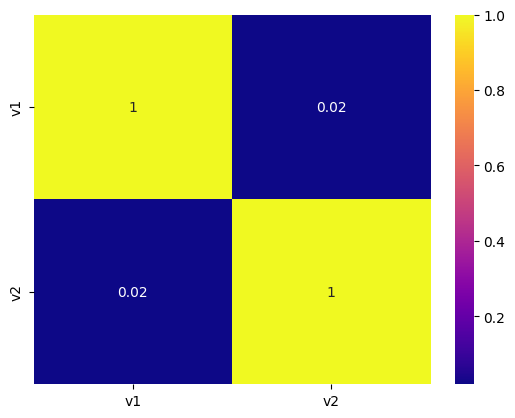

In [ ]:
sns.heatmap(data=df.corr(),annot=True,cmap='plasma')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   v1      5572 non-null   int64
 1   v2      5572 non-null   int64
dtypes: int64(2)
memory usage: 87.2 KB


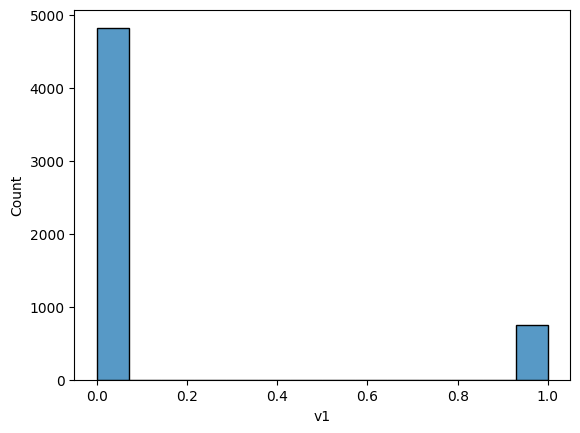

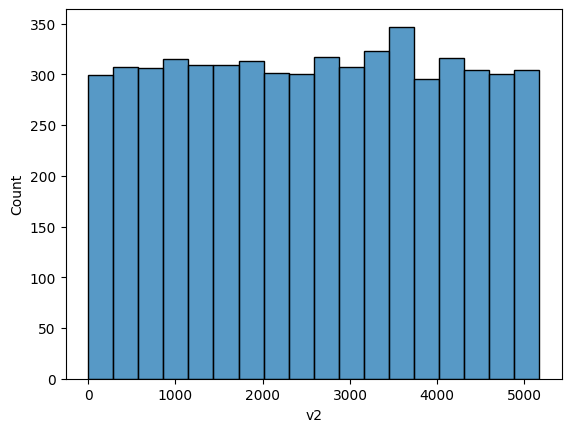

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

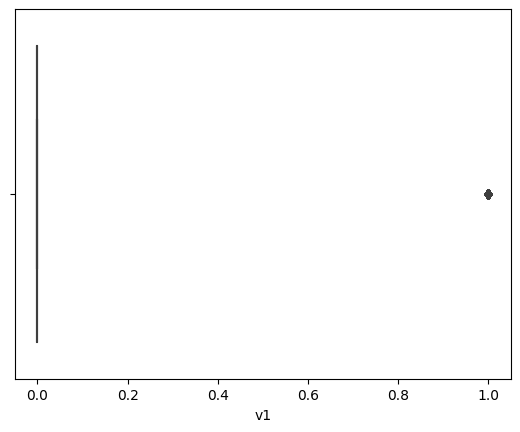

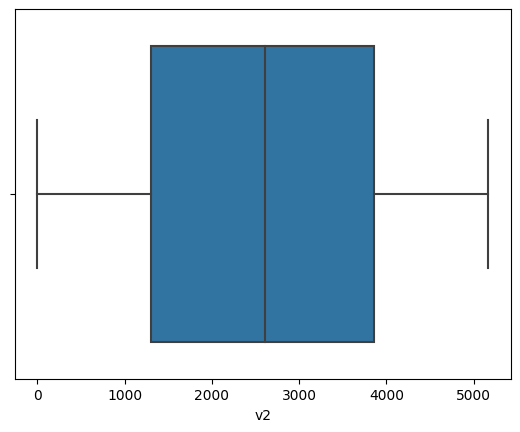

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(x=df[i])
        plt.show();

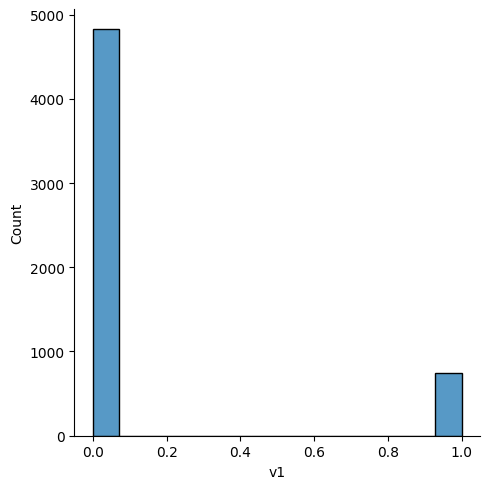

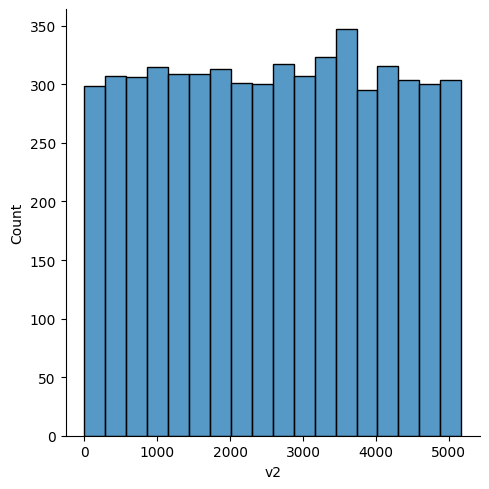

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.displot(x=df[i])
        plt.show();

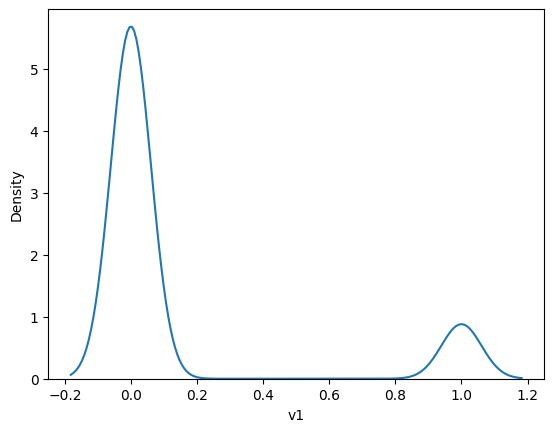

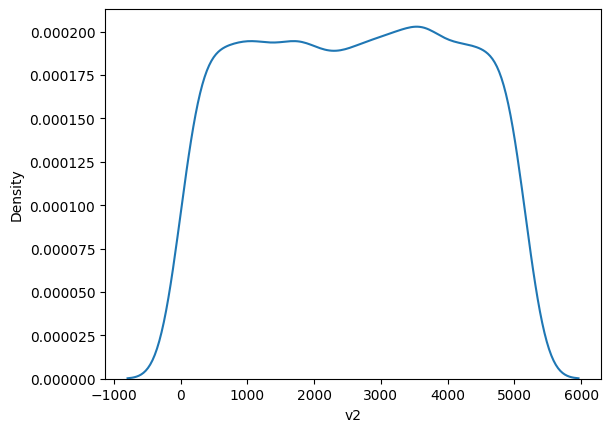

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

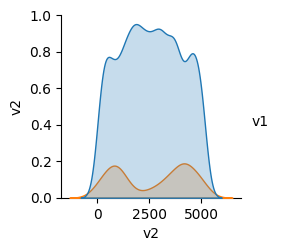

In [ ]:
sns.pairplot(data=df,kind="scatter", hue="v1");
plt.show();

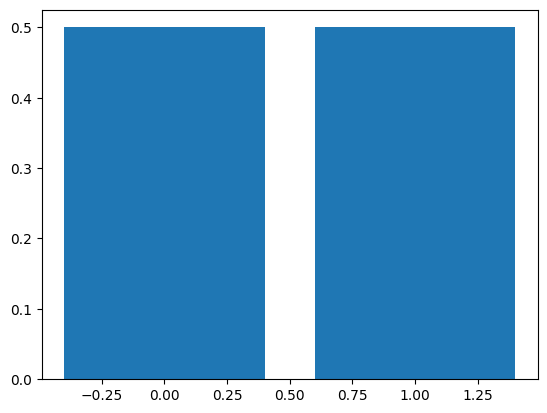

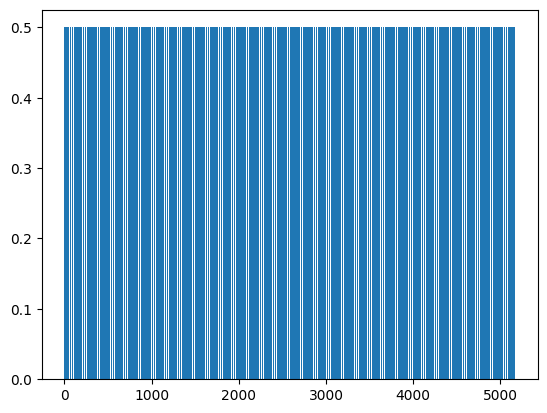

In [ ]:
for i in df.columns:
    if df[i].dtype !="object":
        plt.bar(x=df[i],height=0.5)
        plt.show();

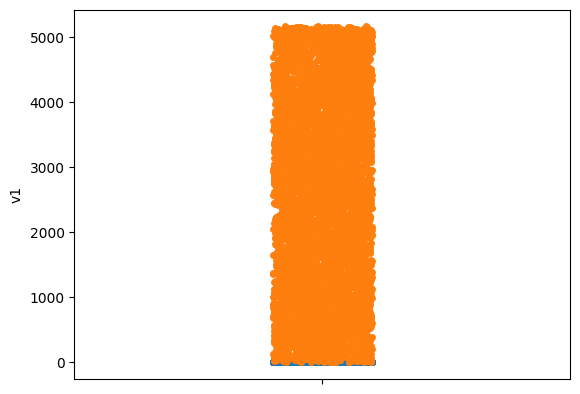

In [ ]:
for i in df.columns:
  sns.stripplot(df[i]);

<Axes: xlabel='v1', ylabel='count'>

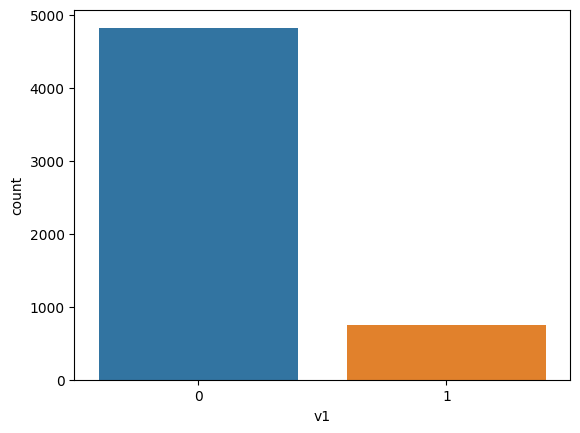

In [ ]:
sns.countplot(x=df['v1'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
def examine_dataset(df, target_column):
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0
def handle_imbalanced_data(df, target_column):
    imbalance = examine_dataset(df, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return df
    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    if choice == '1':
    # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
    # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
    # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
    # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
    # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return df
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return df
    # Create a new balanced DataFrame
    balanced_df = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_df
df = handle_imbalanced_data(df, 'v1')
df.shape

Class Distribution:
0    4825
1     747
Name: v1, dtype: int64
Imbalance Ratio: 6.459170013386881
Select an option to handle the imbalanced dataset:
1. Random Oversampling
2. Random Undersampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. ADASYN (Adaptive Synthetic)
5. Proceed without handling
Enter your choice (1-5): 1


(9650, 2)

In [ ]:
df.shape

(9650, 2)

<Axes: xlabel='v1', ylabel='count'>

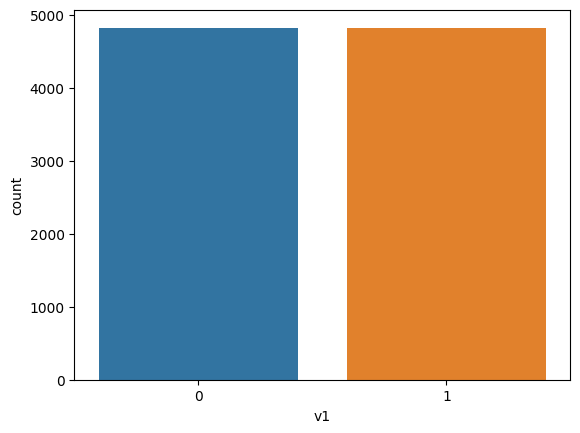

In [ ]:
sns.countplot(x=df['v1'])

In [ ]:
x=df.iloc[:,:-1].values

In [ ]:
x

array([[1079],
       [3101],
       [1000],
       ...,
       [1020],
       [4785],
       [4895]])

In [ ]:
df

,v2,v1
0,1079,0
1,3101,0
2,1000,1
3,4088,0
4,2757,0
...,...,...
9645,4148,1
9646,128,1
9647,1020,1
9648,4785,1


In [ ]:
y=df.iloc[:,1].values

In [ ]:
y

array([0, 0, 1, ..., 1, 1, 1])

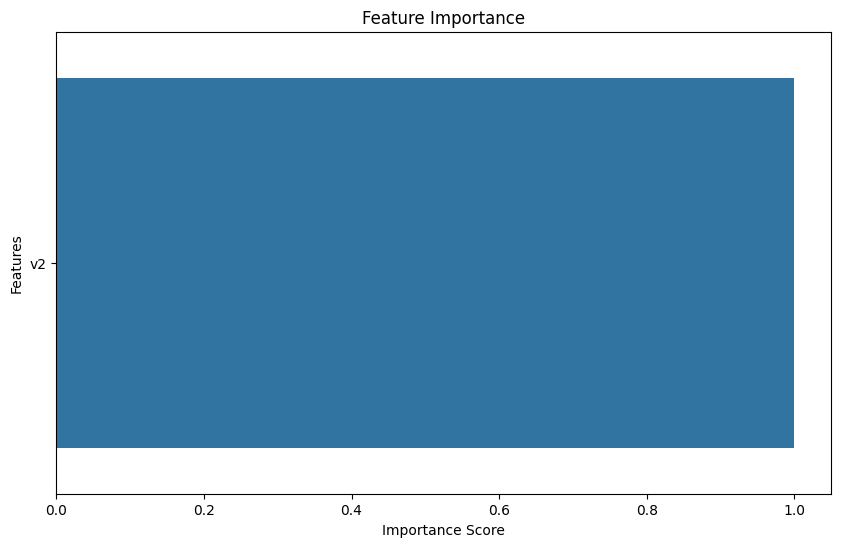

In [ ]:
from sklearn.feature_selection import RFE #not that much important here
from sklearn.ensemble import RandomForestClassifier
num_features = 2
target_variable = "v1"
X = df.drop(target_variable, axis=1)
y = df[target_variable]
model = RandomForestClassifier()
model.fit(X, y)
importance_scores = model.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1}")
auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9715025906735751
precision: 0.9475691134413727
recall: 1.0
f1_score: 0.9730788056779246
auc_roc: 0.9706196581196581
[[881  55]
 [  0 994]]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")
f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")
auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.5409326424870466
precision: 0.5616438356164384
recall: 0.4949698189134809
f1_score: 0.5262032085561498
auc_roc: 0.5423567043285353
[[552 384]
 [502 492]]


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"precision: {precision}")
recall = recall_score(y_test, y_pred)
print(f"recall: {recall}")
f1_score = f1_score(y_test, y_pred)
print(f"f1_score: {f1_score}")
auc_roc = roc_auc_score(y_test, y_pred)
print(f"auc_roc: {auc_roc}")
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8098445595854922
precision: 0.8076545632973503
recall: 0.8279678068410463
f1_score: 0.8176850471932439
auc_roc: 0.8092830487196685
[[740 196]
 [171 823]]


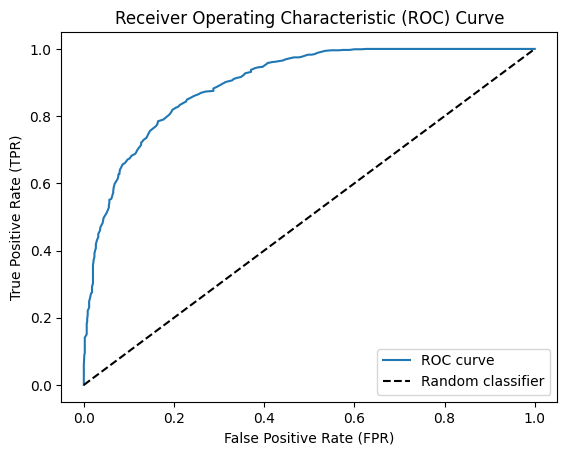

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()